In [92]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [93]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from datetime import datetime
from pandas.tseries.offsets import BDay
import seaborn as sns

from MA_PREDICTOR.car import get_abnormal_return, calculate_car, calculate_ar
from MA_PREDICTOR.global_vars import STOCKS, MARKET
from MA_PREDICTOR.data import add_car

In [94]:
data = pd.read_csv('../MA_PREDICTOR/data/ma_data.csv',
                   parse_dates=['announcement_date'])[['id', 'announcement_date', 'acquiror_ticker']]

# Deep dive: single observations

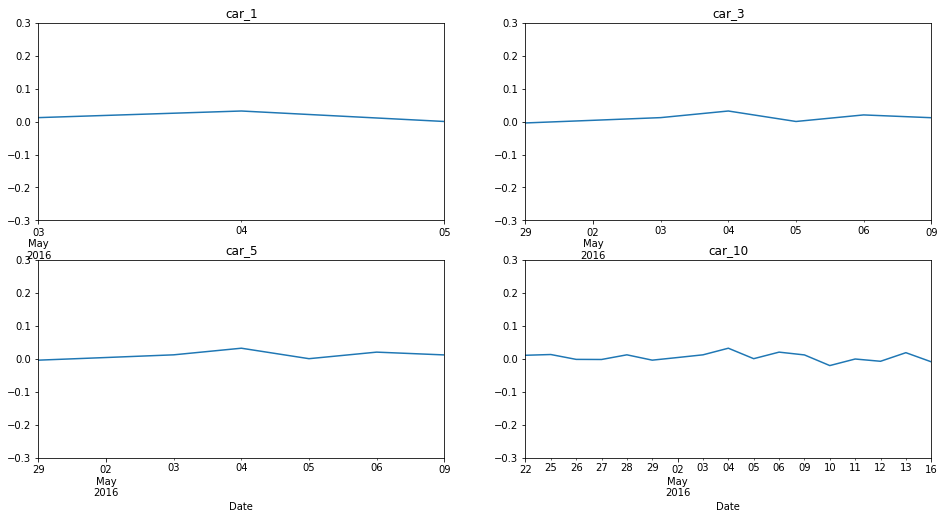

In [153]:
# Generating random samples
sample = data.iloc[np.random.randint(len(data))]
horizons = [1, 3, 5, 10]

# Getting abnormal return for specified timeframe
abnormal_returns = []
for horizon in horizons:
    if sample.acquiror_ticker in STOCKS:
        abnormal_returns.append(calculate_ar(sample.acquiror_ticker, sample.announcement_date,
                                            start=horizon, end=horizon))

fig, axes = plt.subplots(2,2, figsize=(16, 8))
i = -1
for x in range(2):
    for y in range(2):
        i += 1
        returns = abnormal_returns[i]
        returns.plot(ylim=(-0.3, 0.3),
                     title=f'car_{horizons[i]}',
                     ax=axes[x][y]);

# Dataset

In [99]:
data_car = pd.read_csv('../MA_PREDICTOR/data/ma_data_car_clean.csv'
                      )[['car_1', 'car_3', 'car_5', 'car_10']]

# Removing outliers just to be sure
horizons = [1, 3, 5, 10]
for horizon in horizons:
    #data_car = data_car[(abs(data_car[f'car_{horizon}']) <= 0.3)]
    pass

In [100]:
data_car.describe()

,car_1,car_3,car_5,car_10
count,15815.000000,15815.000000,15815.000000,15815.000000
mean,0.003064,0.003504,0.003969,0.005693
std,0.042765,0.052723,0.059069,0.074544
min,-0.297229,-0.298809,-0.298254,-0.299805
25%,-0.014652,-0.020009,-0.024052,-0.032082
50%,0.001424,0.002049,0.002690,0.005215
75%,0.019328,0.025520,0.030785,0.044215
max,0.274971,0.296984,0.298908,0.299557


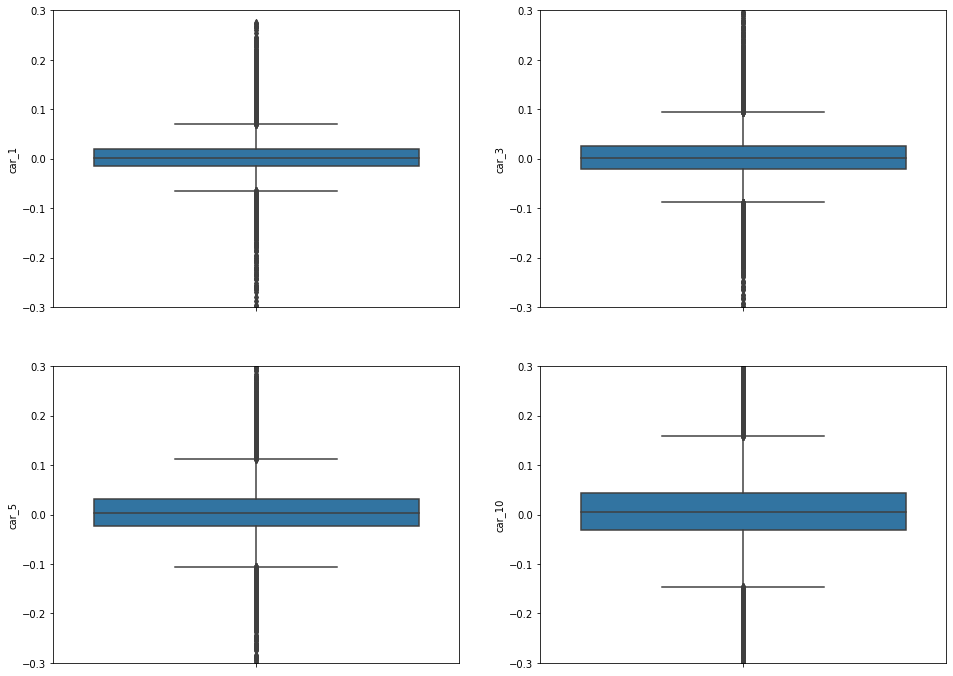

In [163]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
horizons = [1, 3, 5, 10]

i = -1
for x in range(2):
    for y in range(2):
        i += 1
        horizon = horizons[i]
        g = sns.boxplot(data=data_car, y=f'car_{horizon}',
                        showfliers=True,
                        ax=axes[x][y]
                       );
        g.set(ylim=(-0.3, 0.3))

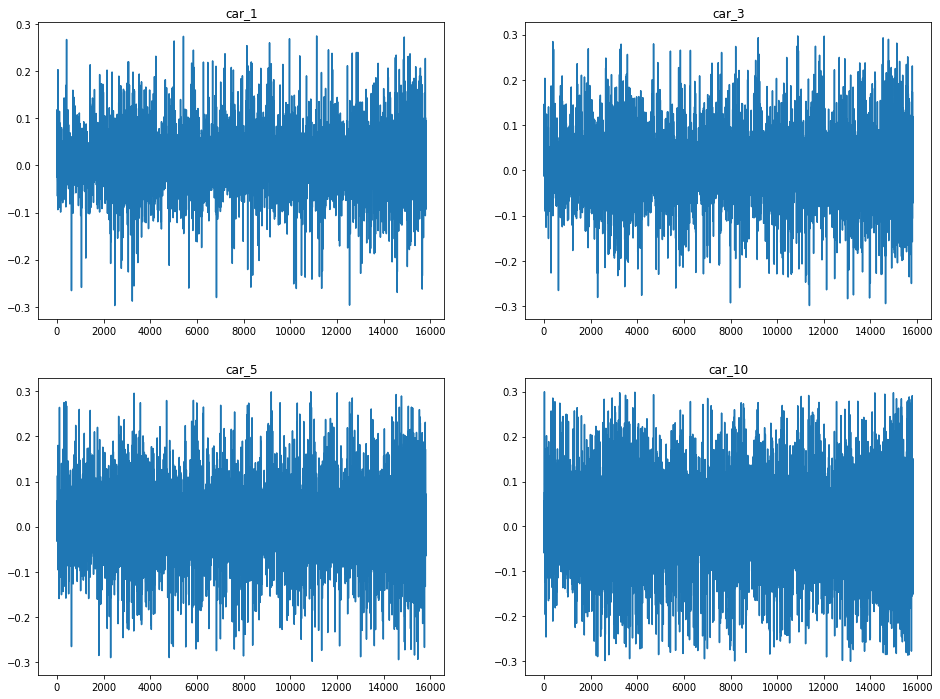

In [134]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
horizons = [1, 3, 5, 10]

i = -1 # To access different values in horizon list
for x in range(2):
    for y in range(2):
        i += 1
        horizon = horizons[i]
        data_car[f'car_{horizon}'].plot(ax=axes[x][y], title=f'car_{horizon}')

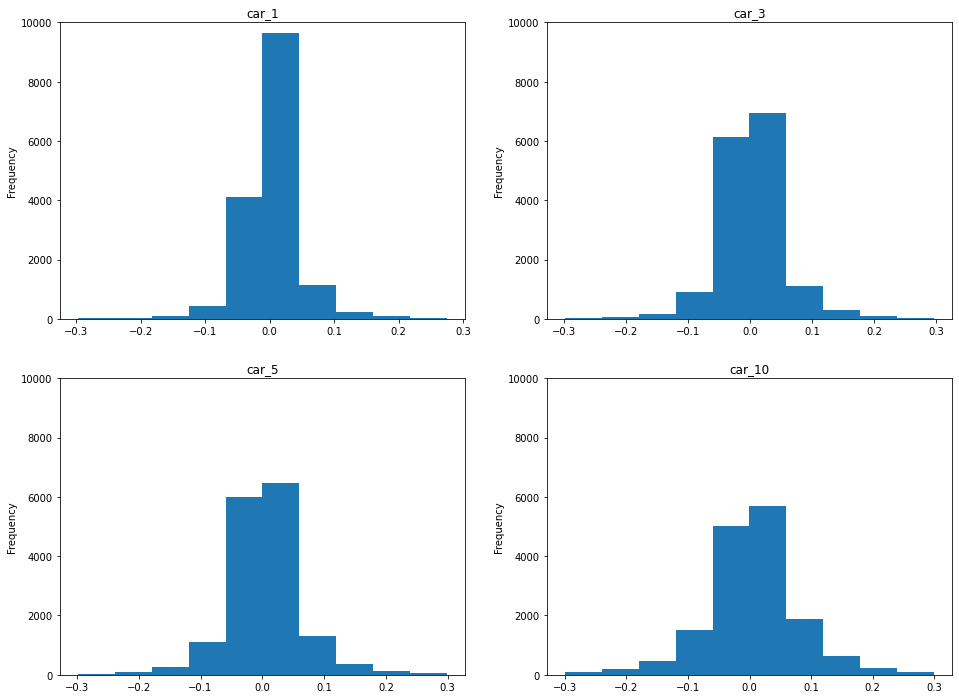

In [159]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
horizons = [1, 3, 5, 10]

i = -1 # To access different values in horizon list
for x in range(2):
    for y in range(2):
        i += 1
        horizon = horizons[i]
        data_car[f'car_{horizon}'].plot.hist(ax=axes[x][y], title=f'car_{horizon}', ylim=(0,10000))